# imports 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import statistics as st

In [2]:
pd.options.display.max_rows = 500

# load data

In [3]:

def get_df(day):
    file_name = f"prices_round_1_day_{day}.csv"
    df = pd.read_csv(file_name, sep=';')
    df['timestamp'] = df['timestamp'] + 1_000_000 * (day - 1)
    return df

def get_trades_df(day):
    file_name = f"trades_round_1_day_{day}.csv"
    return pd.read_csv(file_name, sep=';')

def get_product(df, product):
    return df[df['product'] == product].copy()

def get_first_three_dfs():
    first_df = get_df(-2)
    second_df = get_df(-1)
    third_df = get_df(0)
    return pd.concat([first_df, second_df, third_df])

day = -1
market_data = pd.read_csv(f"prices_round_1_day_{day}.csv")
trade_history = pd.read_csv(f"trades_round_1_day_{day}.csv")

In [4]:
market_data = pd.read_csv(f"prices_round_1_day_{day}.csv", sep=';')

In [5]:
print(market_data.columns)
kelp_data = market_data[market_data['product'] == 'KELP'].reset_index(drop=True)

Index(['day', 'timestamp', 'product', 'bid_price_1', 'bid_volume_1',
       'bid_price_2', 'bid_volume_2', 'bid_price_3', 'bid_volume_3',
       'ask_price_1', 'ask_volume_1', 'ask_price_2', 'ask_volume_2',
       'ask_price_3', 'ask_volume_3', 'mid_price', 'profit_and_loss'],
      dtype='object')


# research

In [6]:
kelp_data = market_data[market_data['product'] == 'KELP'].reset_index(drop=True)

In [7]:
kelp_data['bid_volume_1'].value_counts()

bid_volume_1
1     940
27    740
30    690
28    689
24    682
25    678
29    675
23    657
26    655
22    654
21    500
31    480
2     335
20    244
32    230
3     178
4     174
5     138
6     117
7      84
33     80
8      73
34     65
35     40
19     28
9      27
36     26
37     26
10     25
38     15
39     13
18     11
17      9
40      7
16      4
11      4
13      2
15      2
14      2
12      1
Name: count, dtype: int64

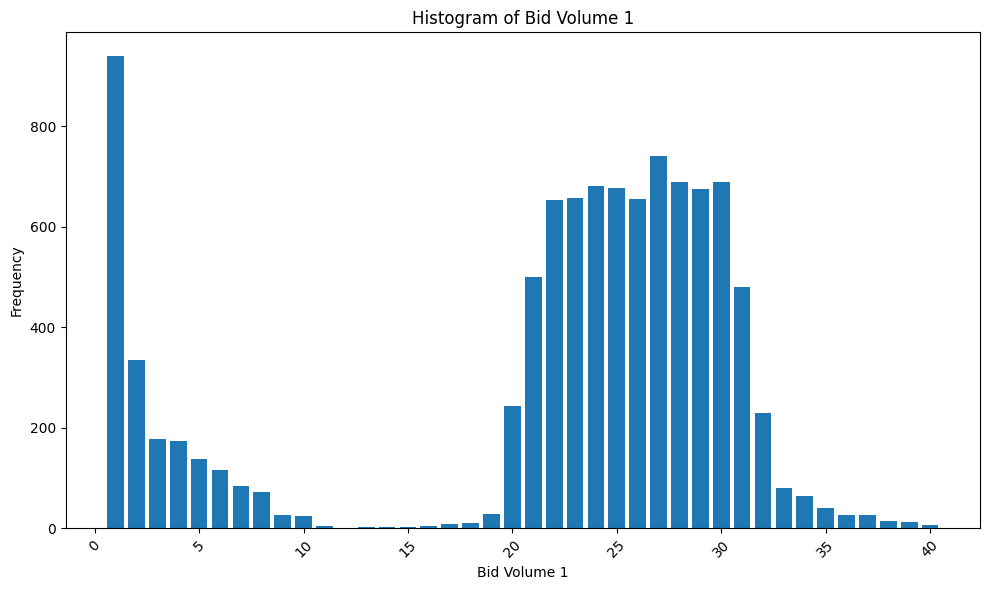

In [8]:
# Get the value counts of bid_volume_1
bid_volume_counts = kelp_data['bid_volume_1'].value_counts()

# Create a histogram
plt.figure(figsize=(10, 6))
plt.bar(bid_volume_counts.index, bid_volume_counts.values)
plt.xlabel('Bid Volume 1')
plt.ylabel('Frequency')
plt.title('Histogram of Bid Volume 1')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

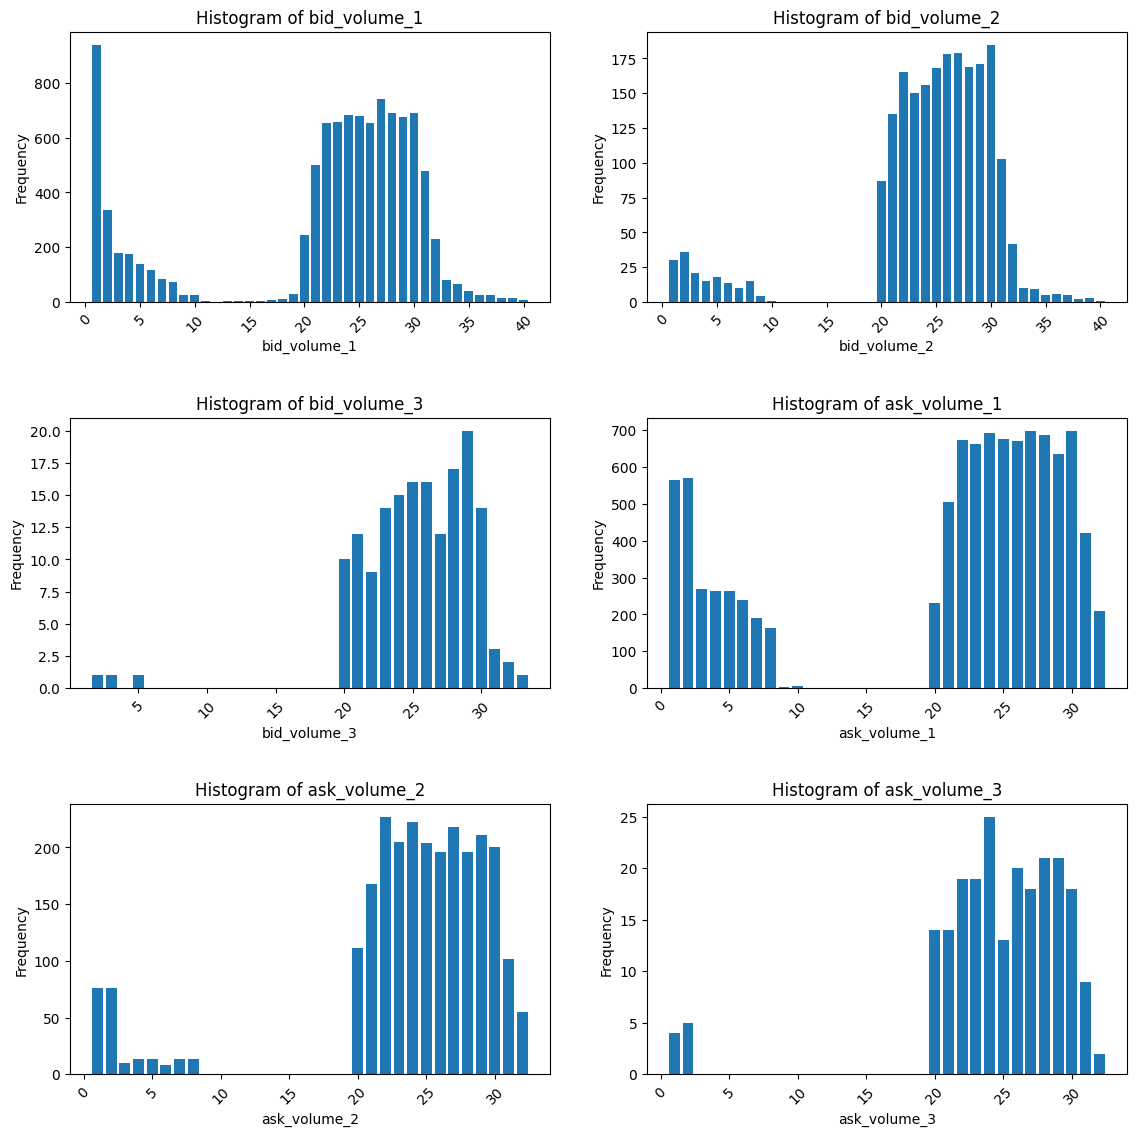

In [9]:
columns_to_plot = ['bid_volume_1', 'bid_volume_2', 'bid_volume_3',
                   'ask_volume_1', 'ask_volume_2', 'ask_volume_3']

num_plots = len(columns_to_plot)
num_rows = (num_plots + 1) // 2
num_cols = 2

plt.figure(figsize=(12, 4 * num_rows))

for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(num_rows, num_cols, i)
    
    volume_counts = kelp_data[column].value_counts()
    
    plt.bar(volume_counts.index, volume_counts.values)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.xticks(rotation=45)
    plt.tight_layout(pad=3.0)

plt.show()

In [10]:
def calculate_mm_mid(row):
    # Find the best bid with volume >= 20
    for i in range(1, 4):
        if row[f'bid_volume_{i}'] >= 20:
            best_bid = row[f'bid_price_{i}']
            break
    else:
        best_bid = None

    # Find the best ask with volume >= 20
    for i in range(1, 4):
        if row[f'ask_volume_{i}'] >= 20:
            best_ask = row[f'ask_price_{i}']
            break
    else:
        best_ask = None

    # Calculate the mid price if both best bid and ask are found
    if best_bid is not None and best_ask is not None:
        return (best_bid + best_ask) / 2
    else:
        return None

kelp_data['mm_mid'] = kelp_data.apply(calculate_mm_mid, axis=1)

In [11]:
kelp_data

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,mm_mid
0,-1,0,KELP,2028,1,2026.0,2.0,2025.0,29.0,2029,31,NaN,NaN,NaN,NaN,2028.5,0.0,2027.0
1,-1,100,KELP,2025,24,NaN,NaN,NaN,NaN,2028,2,2029.0,22.0,NaN,NaN,2026.5,0.0,2027.0
2,-1,200,KELP,2025,22,NaN,NaN,NaN,NaN,2028,20,NaN,NaN,NaN,NaN,2026.5,0.0,2026.5
3,-1,300,KELP,2025,31,NaN,NaN,NaN,NaN,2028,2,2029.0,29.0,NaN,NaN,2026.5,0.0,2027.0
4,-1,400,KELP,2025,27,NaN,NaN,NaN,NaN,2028,27,NaN,NaN,NaN,NaN,2026.5,0.0,2026.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-1,999500,KELP,2029,5,2028.0,31.0,NaN,NaN,2030,6,2031.0,2.0,2032.0,29.0,2029.5,0.0,2030.0
9996,-1,999600,KELP,2029,5,2028.0,30.0,NaN,NaN,2031,30,NaN,NaN,NaN,NaN,2030.0,0.0,2029.5
9997,-1,999700,KELP,2028,26,NaN,NaN,NaN,NaN,2032,26,NaN,NaN,NaN,NaN,2030.0,0.0,2030.0
9998,-1,999800,KELP,2028,20,NaN,NaN,NaN,NaN,2031,20,NaN,NaN,NaN,NaN,2029.5,0.0,2029.5


In [12]:
# Create the plot using Plotly Express
fig = px.line(kelp_data, x='timestamp', y='mm_mid', title='MM Mid Price Over Time')

# Customize the layout
fig.update_layout(
    xaxis_title='Timestamp',
    yaxis_title='MM Mid Price',
)

# Display the plot
fig.show()

In [13]:
kelp_fair_prices = kelp_data[['timestamp', 'mm_mid']]

In [14]:
kelp_fair_prices = kelp_fair_prices.rename(columns={'mm_mid': 'fair'})

In [15]:
kelp_fair_prices

,timestamp,fair
0,0,2027.0
1,100,2027.0
2,200,2026.5
3,300,2027.0
4,400,2026.5
...,...,...
9995,999500,2030.0
9996,999600,2029.5
9997,999700,2030.0
9998,999800,2029.5


In [16]:
iteration_counts = [1,2,5,10,50, 100, 500,] # we lose too much data with 1000 

In [17]:
for iterations in iteration_counts:
    kelp_fair_prices[f"fair_in_{iterations}_its"] = kelp_fair_prices['fair'].shift(-iterations)
    kelp_fair_prices[f"fair_{iterations}_its_ago"] = kelp_fair_prices['fair'].shift(iterations)

In [18]:
kelp_fair_prices

,timestamp,fair,fair_in_1_its,fair_1_its_ago,fair_in_2_its,fair_2_its_ago,fair_in_5_its,fair_5_its_ago,fair_in_10_its,fair_10_its_ago,fair_in_50_its,fair_50_its_ago,fair_in_100_its,fair_100_its_ago,fair_in_500_its,fair_500_its_ago
0,0,2027.0,2027.0,NaN,2026.5,NaN,2026.5,NaN,2025.5,NaN,2024.5,NaN,2024.5,NaN,2021.0,NaN
1,100,2027.0,2026.5,2027.0,2027.0,NaN,2026.5,NaN,2026.0,NaN,2024.5,NaN,2024.5,NaN,2020.5,NaN
2,200,2026.5,2027.0,2027.0,2026.5,2027.0,2026.0,NaN,2026.0,NaN,2024.5,NaN,2024.0,NaN,2021.0,NaN
3,300,2027.0,2026.5,2026.5,2026.5,2027.0,2025.0,NaN,2026.0,NaN,2024.5,NaN,2023.5,NaN,2021.0,NaN
4,400,2026.5,2026.5,2027.0,2026.5,2026.5,2025.5,NaN,2026.0,NaN,2025.0,NaN,2024.0,NaN,2021.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,999500,2030.0,2029.5,2030.0,2030.0,2029.5,NaN,2031.0,NaN,2032.0,NaN,2031.5,NaN,2032.5,NaN,2033.5
9996,999600,2029.5,2030.0,2030.0,2029.5,2030.0,NaN,2030.0,NaN,2032.0,NaN,2031.5,NaN,2033.0,NaN,2033.5
9997,999700,2030.0,2029.5,2029.5,2029.5,2030.0,NaN,2030.0,NaN,2031.5,NaN,2032.0,NaN,2033.0,NaN,2033.5
9998,999800,2029.5,2029.5,2030.0,NaN,2029.5,NaN,2029.5,NaN,2031.5,NaN,2032.0,NaN,2033.0,NaN,2033.5


In [19]:
for iterations in iteration_counts:
    kelp_fair_prices[f'returns_in_{iterations}_its'] = (kelp_fair_prices[f'fair_in_{iterations}_its'] - kelp_fair_prices['fair'])/kelp_fair_prices['fair']
    kelp_fair_prices[f'returns_from_{iterations}_its_ago'] = (kelp_fair_prices['fair'] - kelp_fair_prices[f'fair_{iterations}_its_ago'])/kelp_fair_prices[f'fair_{iterations}_its_ago']

In [20]:
kelp_fair_prices.columns

Index(['timestamp', 'fair', 'fair_in_1_its', 'fair_1_its_ago', 'fair_in_2_its',
       'fair_2_its_ago', 'fair_in_5_its', 'fair_5_its_ago', 'fair_in_10_its',
       'fair_10_its_ago', 'fair_in_50_its', 'fair_50_its_ago',
       'fair_in_100_its', 'fair_100_its_ago', 'fair_in_500_its',
       'fair_500_its_ago', 'returns_in_1_its', 'returns_from_1_its_ago',
       'returns_in_2_its', 'returns_from_2_its_ago', 'returns_in_5_its',
       'returns_from_5_its_ago', 'returns_in_10_its',
       'returns_from_10_its_ago', 'returns_in_50_its',
       'returns_from_50_its_ago', 'returns_in_100_its',
       'returns_from_100_its_ago', 'returns_in_500_its',
       'returns_from_500_its_ago'],
      dtype='object')

In [21]:
kelp_returns = kelp_fair_prices[['timestamp','fair','returns_in_1_its', 'returns_from_1_its_ago',
       'returns_in_2_its', 'returns_from_2_its_ago', 'returns_in_5_its',
       'returns_from_5_its_ago', 'returns_in_10_its',
       'returns_from_10_its_ago', 'returns_in_50_its',
       'returns_from_50_its_ago', 'returns_in_100_its',
       'returns_from_100_its_ago', 'returns_in_500_its',
       'returns_from_500_its_ago']]

In [22]:
kelp_returns= kelp_returns.dropna()

In [23]:
kelp_returns.mean()

timestamp                   4.997402e+05
fair                        2.023702e+03
returns_in_1_its            6.513294e-07
returns_from_1_its_ago      1.329139e-06
returns_in_2_its            1.177414e-06
returns_from_2_its_ago      2.377045e-06
returns_in_5_its            3.119421e-06
returns_from_5_its_ago      4.624874e-06
returns_in_10_its           5.188853e-06
returns_from_10_its_ago     1.044339e-05
returns_in_50_its           3.718371e-05
returns_from_50_its_ago     3.809781e-05
returns_in_100_its          8.127551e-05
returns_from_100_its_ago    7.679041e-05
returns_in_500_its          4.348751e-04
returns_from_500_its_ago    2.792382e-04
dtype: float64

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from tqdm import tqdm

# Perform train-test split
train_data, test_data = train_test_split(kelp_returns, test_size=0.2, random_state=42)

# Iterate over each iteration count
for iterations in tqdm(iteration_counts):
    # Prepare the feature and target columns
    X_train = train_data[f'returns_from_{iterations}_its_ago'].values.reshape(-1, 1)
    y_train = train_data[f'returns_in_{iterations}_its']
    X_test = test_data[f'returns_from_{iterations}_its_ago'].values.reshape(-1, 1)
    y_test = test_data[f'returns_in_{iterations}_its']

    # Create and train the linear regression model
    model = LinearRegression(fit_intercept=False)
    model.fit(X_train, y_train)

    # Make predictions on train and test data
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Calculate R-squared and MSE for train and test data
    train_r2 = r2_score(y_train, train_predictions)
    train_mse = mean_squared_error(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)

    # Print the results
    print(f"Iteration Count: {iterations}")
    print(f"Learned Equation: returns_in_{iterations}_its = {model.coef_[0]:.4f} * returns_from_{iterations}_its_ago")
    print(f"Train R-squared: {train_r2:.4f}")
    print(f"Train MSE: {train_mse:.4f}")
    print(f"Test R-squared: {test_r2:.4f}")
    print(f"Test MSE: {test_mse:.4f}")
    print()

100%|██████████| 7/7 [00:00<00:00, 218.46it/s]

Iteration Count: 1
Learned Equation: returns_in_1_its = -0.2324 * returns_from_1_its_ago
Train R-squared: 0.0538
Train MSE: 0.0000
Test R-squared: 0.0640
Test MSE: 0.0000

Iteration Count: 2
Learned Equation: returns_in_2_its = -0.2005 * returns_from_2_its_ago
Train R-squared: 0.0393
Train MSE: 0.0000
Test R-squared: 0.0458
Test MSE: 0.0000

Iteration Count: 5
Learned Equation: returns_in_5_its = -0.0421 * returns_from_5_its_ago
Train R-squared: 0.0012
Train MSE: 0.0000
Test R-squared: 0.0041
Test MSE: 0.0000

Iteration Count: 10
Learned Equation: returns_in_10_its = -0.0489 * returns_from_10_its_ago
Train R-squared: 0.0020
Train MSE: 0.0000
Test R-squared: -0.0011
Test MSE: 0.0000

Iteration Count: 50
Learned Equation: returns_in_50_its = -0.1779 * returns_from_50_its_ago
Train R-squared: 0.0278
Train MSE: 0.0000
Test R-squared: 0.0153
Test MSE: 0.0000

Iteration Count: 100
Learned Equation: returns_in_100_its = -0.0449 * returns_from_100_its_ago
Train R-squared: -0.0091
Train MSE: 0.

In [25]:
!pip install scikit-learn

In [26]:
1/5000

0.0002

In [27]:
-0.2221*1/5000

-4.442e-05

In [28]:
_ * 5000

-0.2221

In [29]:
# Assuming kelp_data already filtered and sorted by timestamp
kelp_data['mid_price_t-1'] = kelp_data['mid_price'].shift(1)

# Drop NaNs introduced by shift
kelp_clean = kelp_data.dropna(subset=['mid_price', 'mid_price_t-1'])

# Reversion beta = slope of regressing current mid_price on lagged mid_price
from sklearn.linear_model import LinearRegression

X = kelp_clean[['mid_price_t-1']]
y = kelp_clean['mid_price']

model = LinearRegression().fit(X, y)
reversion_beta = model.coef_[0]
print("Reversion Beta:", reversion_beta)


Reversion Beta: 0.983823484692747
